### Load Data and further processing

In [1]:
import os
import time
import random
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn import model_selection, preprocessing, metrics, feature_extraction, datasets

C:\Users\fx.chen.2021\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd
import os
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# make sure that the helpers6.py and dataset_path.py files are in the same folder as this jupyter notebook
from helpers6 import *

In [15]:
data = pd.read_csv('data/final_data.csv')
data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV,Income per capita
0,1,0,0,0,-1.236724,1,0,0,2,2,...,0,0,0,1,3,-0.362660,-0.959674,1,-0.981675,0.171608
1,0,0,0,1,-1.236724,1,0,1,0,0,...,0,0,0,1,2,0.197365,-0.940470,1,-1.436462,0.171608
2,0,0,0,1,-0.992402,1,2,1,0,0,...,2,2,0,1,2,1.159546,-0.645186,1,0.821409,0.171608
3,0,0,1,1,-0.177995,1,2,1,0,0,...,2,2,0,1,2,1.330711,0.337349,1,0.509483,0.171608
4,1,0,0,1,0.677133,1,2,1,0,2,...,2,2,0,1,0,1.294151,1.216004,1,0.794358,0.171608


In [16]:
#drop highly correlated column 'Total Charges' for regression
data=data.drop(['Total Charges'],axis=1)

In [18]:
confidence_interval = 95
random_seed = 2024

In [19]:
x = data.drop('Churn Value', axis = 1).values
y = data['Churn Value'].values

smote = SMOTE(sampling_strategy = 1)
x,y = smote.fit_resample(x, y)

In [20]:
columns = data.columns.tolist()
resampled_df = pd.DataFrame(x, columns=columns[:-1])

In [21]:
#Split train and test set:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state =random_seed, test_size = 0.2)

In [22]:
result_list = []

### Logistic Regression

Logistic Regression:
Training time: 0.06732177734375 seconds
AUC: 0.8663370681605977
AUPRC: 0.8453452847824954
Sensitivity: 0.8
Specificity: 0.7784313725490196
Score thresold: 0.5422591100808883
2.5 97.5


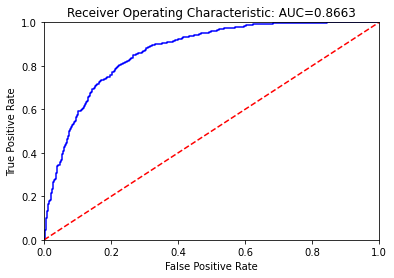

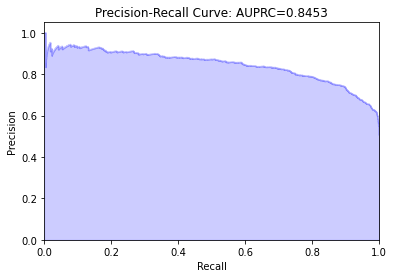

In [10]:
print("Logistic Regression:")
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=random_seed)
start = time.time()
logreg.fit(x_train,y_train)
runtime = time.time()-start
import pickle
with open('task1_logreg.pickle', 'wb') as model_dump:
    pickle.dump(logreg, model_dump)
print('Training time:', runtime, 'seconds')
probs = logreg.predict_proba(x_test)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["LR"]
results.extend(result)
results.append(runtime)
result_list.append(results)
